In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
jury = {"Ethnicity":["Asian","Black","Latino","White","Other"],"Eligible":[0.15,0.18,0.12,0.54,0.01],"Panels":[0.26,0.08,0.08,0.54,0.04]}
jury

{'Ethnicity': ['Asian', 'Black', 'Latino', 'White', 'Other'],
 'Eligible': [0.15, 0.18, 0.12, 0.54, 0.01],
 'Panels': [0.26, 0.08, 0.08, 0.54, 0.04]}

In [3]:
Alameda_df = pd.DataFrame(jury)
Alameda_df

,Ethnicity,Eligible,Panels
0,Asian,0.15,0.26
1,Black,0.18,0.08
2,Latino,0.12,0.08
3,White,0.54,0.54
4,Other,0.01,0.04


In [4]:
Alameda_df_1 = Alameda_df.set_index('Ethnicity')
Alameda_df_1

,Eligible,Panels
Ethnicity,,
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


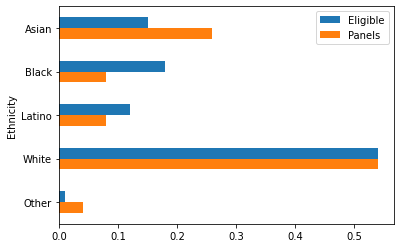

In [5]:
Alameda_df_1 .plot.barh()
plt.ylabel('Ethnicity')
plt.gca().invert_yaxis()

In [6]:
Alameda_df_1['jury_with_diffs'] = Alameda_df_1['Panels']-Alameda_df_1['Eligible']
Alameda_df_1

,Eligible,Panels,jury_with_diffs
Ethnicity,,,
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.10
Latino,0.12,0.08,-0.04
White,0.54,0.54,0.00
Other,0.01,0.04,0.03


In [7]:
Alameda_df_1['Abs.Difference']=abs(Alameda_df_1['jury_with_diffs'])
Alameda_df_1

,Eligible,Panels,jury_with_diffs,Abs.Difference
Ethnicity,,,,
Asian,0.15,0.26,0.11,0.11
Black,0.18,0.08,-0.10,0.10
Latino,0.12,0.08,-0.04,0.04
White,0.54,0.54,0.00,0.00
Other,0.01,0.04,0.03,0.03


In [10]:
test_statistic = Alameda_df_1['Abs.Difference'].sum()/2
test_statistic

0.14

In [9]:
import numpy as np

In [11]:
def total_variation_distance(distribution_1, distribution_2):
    return np.abs(distribution_1 - distribution_2).sum()/2

In [12]:
def table_tvd(table, label, other):
    return total_variation_distance(table[label], table[other])

observed_stat =table_tvd(Alameda_df, 'Eligible', 'Panels')
print(observed_stat)

0.14


In [13]:
panel_size = 1453

In [14]:
import numpy.random as npr
np.random.multinomial(1453,[0.15,0.18,0.12,0.54,0.01])

array([225, 261, 172, 783,  12])

In [15]:
Alameda_df_2 = pd.DataFrame(Alameda_df_1,columns = ['Eligible','Panels'])

In [16]:
Alameda_df_2['Random Sample'] = np.random.multinomial(1453,[0.15,0.18,0.12,0.54,0.01])/1453
Alameda_df_2

,Eligible,Panels,Random Sample
Ethnicity,,,
Asian,0.15,0.26,0.141087
Black,0.18,0.08,0.176875
Latino,0.12,0.08,0.130764
White,0.54,0.54,0.543014
Other,0.01,0.04,0.008259


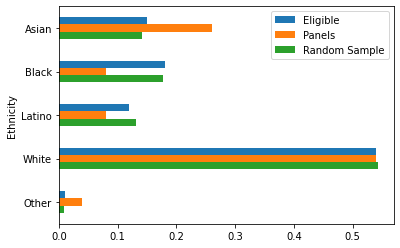

In [17]:
Alameda_df_2.plot.barh()
plt.ylabel('Ethnicity')
plt.gca().invert_yaxis()

In [18]:
#Difference between eligible and Random sample
TVD = (abs(Alameda_df_2['Eligible']-Alameda_df_2['Random Sample'])).sum()/2
TVD

0.013778389538885053

In [19]:
simulations = 5000
tvd_list=[]
for i in np.arange(simulations):
    Alameda_df_2["Random Sample"]=(npr.multinomial(1453,[0.15, 0.18, 0.12, 0.54, 0.01]))/panel_size
    tvd_list.append(table_tvd(Alameda_df_2, 'Eligible', 'Random Sample'))
    
tvd_list


[0.007962835512732285,
 0.03852718513420509,
 0.010942876806606978,
 0.013695801789401203,
 0.010963523743977972,
 0.025106675843083244,
 0.02897453544390919,
 0.009559532002752889,
 0.02200963523743978,
 0.02168616655196147,
 0.03717825189263592,
 0.023661390227116302,
 0.029807295251204402,
 0.01593255333792155,
 0.028004129387474215,
 0.01168616655196151,
 0.012456985547143886,
 0.017102546455609047,
 0.01916035788024774,
 0.026448726772195435,
 0.009931176875430103,
 0.019201651754989675,
 0.00998623537508606,
 0.023413626978664795,
 0.03778389538885062,
 0.01584308327598073,
 0.008210598761183754,
 0.016483138334480354,
 0.01625602202339991,
 0.03657949070887822,
 0.012174810736407441,
 0.022697866483138353,
 0.017102546455609057,
 0.020633172746042712,
 0.01746730901582929,
 0.02086028905712318,
 0.01868547832071579,
 0.018568479008947016,
 0.008306951135581522,
 0.019373709566414328,
 0.024790089470061945,
 0.01730901582931869,
 0.0031796283551273194,
 0.017315898141775643,
 0.0

In [20]:
tvd_final_df=pd.DataFrame(tvd_list)
tvd_final_df.rename(columns={0:"TVD"},inplace=True) # renaming column
tvd_final_df.head()

,TVD
0,0.007963
1,0.038527
2,0.010943
3,0.013696
4,0.010964


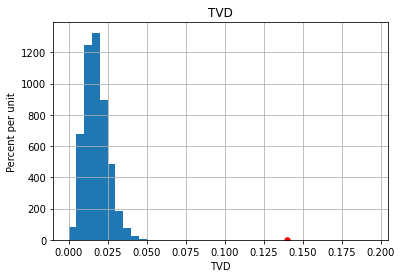

In [21]:
tvd_final_df.hist(bins=np.arange(0,0.2,0.005))
plt.ylabel('Percent per unit')
plt.xlabel('TVD')
plt.scatter(observed_stat, 0, color='red', s=30)